In [1]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

In [2]:
%matplotlib inline

### Load Data from multiple files

In [3]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [4]:
import os
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [5]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [6]:
names2011 = pd.read_csv('names/yob2011.txt')

In [7]:
names2011.head()

,Sophia,F,21816
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236


In [8]:
names2011 = pd.read_csv('names/yob2011.txt',names=['name','sex','number'])

In [9]:
names2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


In [10]:
names_all = []

for year in range(1880,2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),names=['name','sex','number']))
    names_all[-1]['year'] = year

allyears = pd.concat(names_all)

In [11]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [12]:
allyears.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


In [14]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

In [15]:
allyears_indexed.head()

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5

In [16]:
allyears_indexed.loc['F','Mary']

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
1885,9128
1886,9890
1887,9888
1888,11754


### Plot data

In [32]:
def plotname(sex,name):
    data = allyears_indexed.loc[sex,name]
    
    pp.plot(data.index,data.values)

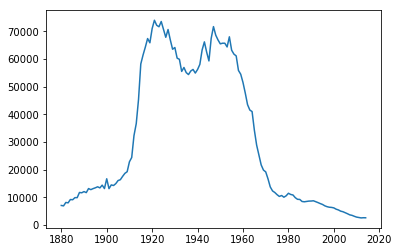

In [33]:
plotname('F',"Mary")

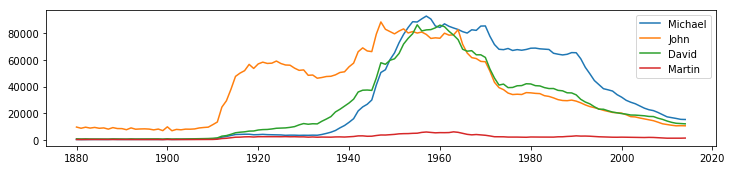

In [20]:
pp.figure(figsize=(12,2.5))

names = ['Michael','John','David','Martin']

for name in names:
    plotname('M',name)

pp.legend(names)

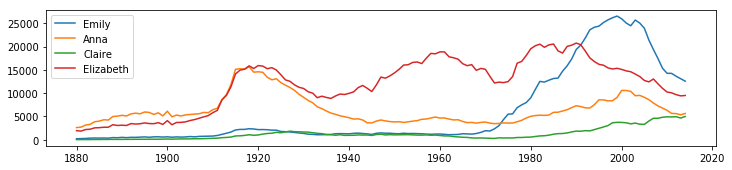

In [21]:
pp.figure(figsize=(12,2.5))

names = ['Emily','Anna','Claire','Elizabeth']

for name in names:
    plotname('F',name)

pp.legend(names)

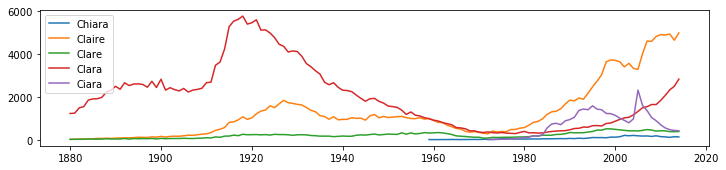

In [22]:
pp.figure(figsize=(12,2.5))

names = ['Chiara','Claire','Clare','Clara','Ciara']

for name in names:
    plotname('F',name)

pp.legend(names)

In [23]:
allyears_indexed.loc['F'].loc[names].head()

number
name   year        
Chiara 1959       9
       1960       5
       1962       8
       1963       8
       1964      12

In [24]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).head()

number                           
name Chiara Ciara Claire   Clara Clare
year                                  
1880    NaN   NaN   21.0  1226.0  15.0
1881    NaN   NaN   23.0  1242.0  20.0
1882    NaN   NaN   30.0  1490.0  21.0
1883    NaN   NaN   38.0  1548.0  22.0
1884    NaN   NaN   33.0  1852.0  38.0

In [25]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0).head()

number                           
name Chiara Ciara Claire   Clara Clare
year                                  
1880    0.0   0.0   21.0  1226.0  15.0
1881    0.0   0.0   23.0  1242.0  20.0
1882    0.0   0.0   30.0  1490.0  21.0
1883    0.0   0.0   38.0  1548.0  22.0
1884    0.0   0.0   33.0  1852.0  38.0

In [26]:
variants = allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)

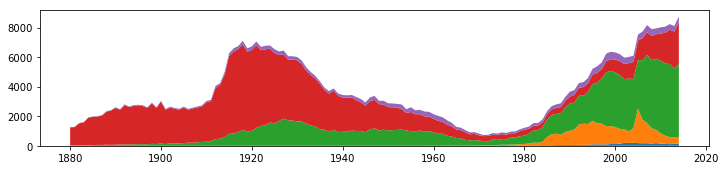

In [30]:
pp.figure(figsize=(12,2.5))

pp.stackplot(variants.index,variants.values.T)

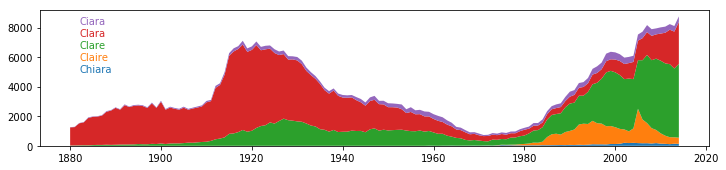

In [31]:
pp.figure(figsize=(12,2.5))

palette = seaborn.color_palette()
pp.stackplot(variants.index,variants.values.T,colors=palette)

for i,name in enumerate(names):
    pp.text(1882,5000 + 800*i,name,color=palette[i])

### Top ten names by year

In [35]:
pop2008 = allyears_indexed.loc['M',:,2008].sort_values('number',ascending=False).head()

In [36]:
pop2008.reset_index().drop(['sex','year','number'],axis=1).head()

,name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel


In [40]:
def topten(sex,year):
    simple = allyears_indexed.loc[sex,:,year].sort_valuestoptens('F',1985,1995)('number',ascending=False).reset_index()
    simple = simple.drop(['sex','year','number'],axis=1).head(10)
    
    simple.columns = [year]
    simple.index = simple.index + 1
    
    return simple

In [41]:
def toptens(sex,year0,year1):
    years = [topten(sex,year) for year in range(year0,year1+1)]
    
    return years[0].join(years[1:])

In [42]:
toptens('M',2000,2010)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
1,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob
2,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Ethan,Ethan
3,Matthew,Matthew,Joshua,Joshua,Joshua,Joshua,Joshua,Ethan,Ethan,Michael,Michael
4,Joshua,Joshua,Matthew,Matthew,Matthew,Matthew,Ethan,Joshua,Joshua,Alexander,Jayden
5,Christopher,Christopher,Ethan,Andrew,Ethan,Ethan,Matthew,Daniel,Daniel,William,William
6,Nicholas,Nicholas,Andrew,Ethan,Andrew,Andrew,Daniel,Christopher,Alexander,Joshua,Alexander
7,Andrew,Andrew,Joseph,Joseph,Daniel,Daniel,Andrew,Anthony,William,Daniel,Noah
8,Joseph,Joseph,Christopher,Daniel,William,Anthony,Christopher,William,Anthony,Jayden,Daniel
9,Daniel,Daniel,Nicholas,Christopher,Joseph,Joseph,Anthony,Matthew,Christopher,Noah,Aiden
10,Tyler,William,Daniel,Anthony,Christopher,Christopher,William,Andrew,Matthew,Christopher,Anthony


In [43]:
toptens('F',1985,1995)

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
1,Jessica,Jessica,Jessica,Jessica,Jessica,Jessica,Ashley,Ashley,Jessica,Jessica,Jessica
2,Ashley,Ashley,Ashley,Ashley,Ashley,Ashley,Jessica,Jessica,Ashley,Ashley,Ashley
3,Jennifer,Amanda,Amanda,Amanda,Brittany,Brittany,Brittany,Amanda,Sarah,Emily,Emily
4,Amanda,Jennifer,Jennifer,Sarah,Amanda,Amanda,Amanda,Brittany,Samantha,Samantha,Samantha
5,Sarah,Sarah,Sarah,Jennifer,Sarah,Samantha,Samantha,Sarah,Emily,Sarah,Sarah
6,Stephanie,Stephanie,Stephanie,Brittany,Samantha,Sarah,Sarah,Samantha,Brittany,Taylor,Taylor
7,Nicole,Nicole,Brittany,Stephanie,Jennifer,Stephanie,Stephanie,Emily,Taylor,Brittany,Hannah
8,Heather,Brittany,Nicole,Samantha,Stephanie,Jennifer,Jennifer,Stephanie,Amanda,Amanda,Brittany
9,Elizabeth,Heather,Heather,Nicole,Lauren,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Amanda
10,Megan,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Lauren,Emily,Megan,Stephanie,Megan,Elizabeth


In [44]:
toptens('F',1985,1995).stack().head()

1  1985    Jessica
   1986    Jessica
   1987    Jessica
   1988    Jessica
   1989    Jessica
dtype: object

In [45]:
toptens('F',1985,1995).stack().value_counts()

Elizabeth    11
Jessica      11
Ashley       11
Sarah        11
Amanda       11
Brittany     10
Stephanie     9
Samantha      8
Jennifer      7
Emily         5
Nicole        4
Heather       3
Megan         3
Taylor        3
Lauren        2
Hannah        1
dtype: int64

In [46]:
popular = toptens('F',1985,1995).stack().value_counts().index[:6]

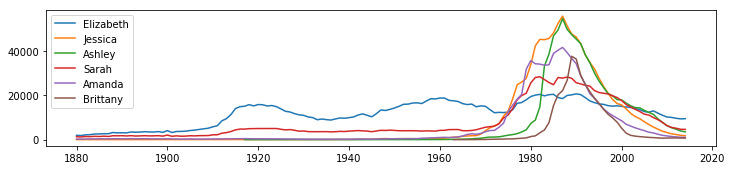

In [47]:
pp.figure(figsize=(12,2.5))

for name in popular:
    plotname('F',name)
    
pp.legend(popular)

### Name fads - appear suddenly and then disappear

In [50]:
allyears.groupby(['sex','name']).sum().head()

number   year
sex name                    
F   Aabha          21   6037
    Aabriella      10   4022
    Aaden           5   2009
    Aadhira        29   6039
    Aadhya        639  16084

In [51]:
allyears.groupby(['sex','name'])['number'].sum().head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

In [82]:
totals = allyears.groupby(['sex','name'])['number'].sum()

In [83]:
def sumsq(x):
    return sum(x**2)

In [120]:
spikyness= allyears.groupby(['sex','name'])['number'].agg(sumsq) / totals**2

In [121]:
spikyness.head()

sex  name     
F    Aabha        0.351474
     Aabriella    0.500000
     Aaden        1.000000
     Aadhira      0.362663
     Aadhya       0.262673
Name: number, dtype: float64

In [128]:
spiky_common = spikyness[totals > 5000].copy()
spiky_common.sort_values(ascending=False,inplace=True)
spiky_common.head(10)

sex  name     
M    Iker         0.199368
     Shaquille    0.195689
     Jase         0.182165
F    Adalynn      0.177107
     Harper       0.164827
M    Brantley     0.160532
F    Arya         0.159564
M    Bentley      0.159259
F    Miley        0.145886
     Paisley      0.144966
Name: number, dtype: float64

In [129]:
spiky_common.tail(5)

sex  name  
F    Rosa      0.008512
     Mollie    0.008437
M    Ike       0.008310
F    Delia     0.008263
     Louisa    0.007931
Name: number, dtype: float64

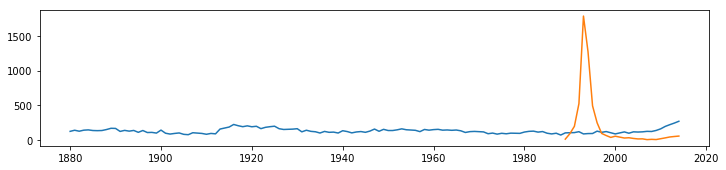

In [130]:
pp.figure(figsize=(12,2.5))

plotname('F','Louisa')
plotname('M','Shaquille')

In [131]:
fads = spiky_common.head(10).index.values

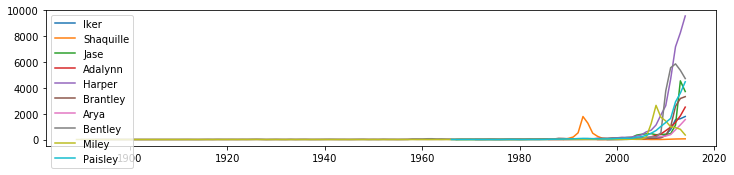

In [132]:
pp.figure(figsize=(12,2.5))

for sex,name in fads:
    plotname(sex,name)

pp.legend([name for sex,name in fads],loc='upper left')

In [133]:
totals_recent = allyears[allyears['year'] > 2005].groupby(['sex','name'])['number'].sum()

In [137]:
spiky_common = spikyness[(totals > 5000) & (totals_recent < 1000)].copy()
spiky_common.sort_values(ascending=False,inplace= True)
spiky_common.head(10)

sex  name     
M    Shaquille    0.195689
F    Katina       0.120872
     Krystle      0.100106
M    Devante      0.099617
F    Khadijah     0.091410
     Shanice      0.089675
     Iesha        0.088810
     Shaniqua     0.087601
     Sheena       0.080751
     Marquita     0.080338
Name: number, dtype: float64

In [138]:
fads = spiky_common.head(10).index.values

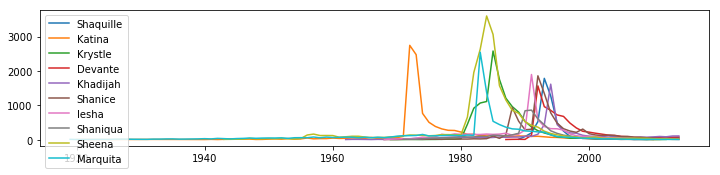

In [139]:
pp.figure(figsize=(12,2.5))

for sex,name in fads:
    plotname(sex,name)

pp.legend([name for sex,name in fads],loc='upper left')

### Challenge

### Identify unisex names wit 1 to 4 ratio between M to F

In [140]:
totals = allyears.groupby(['sex','name'])['number'].sum()

In [141]:
totals

sex  name      
F    Aabha          21
     Aabriella      10
     Aaden           5
     Aadhira        29
     Aadhya        639
     Aadi           16
     Aadison        11
     Aaditri        26
     Aadrika        10
     Aadvika        13
     Aadya         558
     Aadyn          16
     Aafreen         5
     Aagot           5
     Aahana        377
     Aahliyah       24
     Aahna          72
     Aaila          18
     Aailiyah       10
     Aailyah       172
     Aaima          21
     Aaira          73
     Aairah         24
     Aaisha        168
     Aaishah        18
     Aaiyana         5
     Aaiza          16
     Aaja            5
     Aajah          29
     Aajaylah       20
                  ... 
M    Zyquan        266
     Zyquarius      29
     Zyquavion      11
     Zyquavious     20
     Zyquez         38
     Zyran          20
     Zyree          51
     Zyreion         5
     Zyrek           5
     Zyrell         96
     Zyren          84
     Zyreon       

In [142]:
totals_bysex = totals.unstack('sex')
totals_bysex.head()

sex,F,M
name,,
Aaban,NaN,72.0
Aabha,21.0,NaN
Aabid,NaN,5.0
Aabriella,10.0,NaN
Aadam,NaN,196.0


In [143]:
totals_both = totals_bysex.sum(axis = 1)

In [144]:
totals_both.head()

name
Aaban         72.0
Aabha         21.0
Aabid          5.0
Aabriella     10.0
Aadam        196.0
dtype: float64

In [145]:
ratio = totals_bysex['F'] / totals_bysex['M']

In [146]:
ratio.head()

name
Aaban       NaN
Aabha       NaN
Aabid       NaN
Aabriella   NaN
Aadam       NaN
dtype: float64

In [147]:
unisex = (ratio > 0.25) & (ratio < 4)

In [150]:
totals_both = totals_both[unisex]
totals_both.sort_values(ascending=False, inplace = True)
totals_both.head(5)

name
Willie    593888.0
Jordan    479434.0
Taylor    416096.0
Leslie    376587.0
Jamie     350262.0
dtype: float64

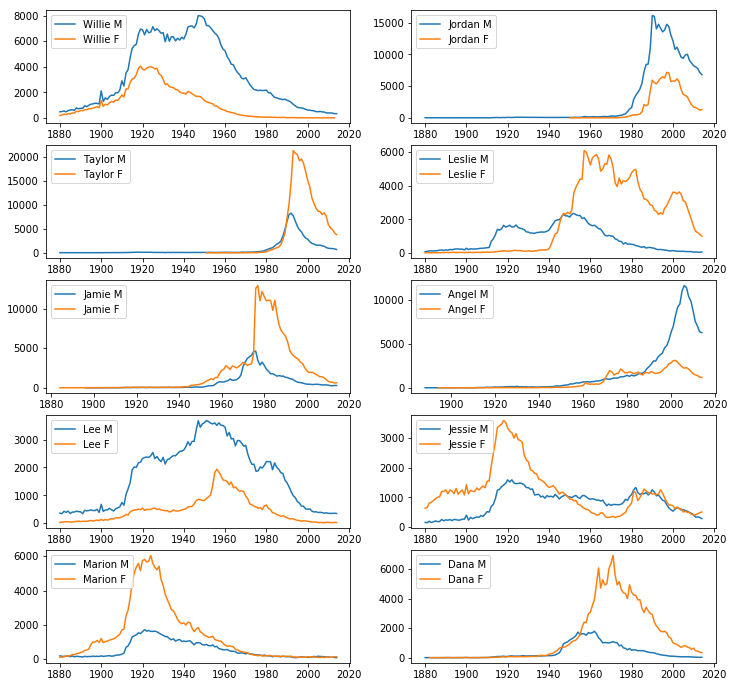

In [151]:
names = totals_both.head(10).index.values

pp.figure(figsize=(12,12))

for i,name in enumerate(names):
    pp.subplot(5,2,i+1)
    
    plotname('M',name)
    plotname('F',name)
    
    pp.legend([name + ' M',name + ' F'],loc='upper left')